<a href="https://colab.research.google.com/github/vivi1231/0807/blob/master/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [71]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
 

In [45]:
train_images.shape
# 60000個圖像標籤，28*28像數

(60000, 28, 28)

In [61]:
test_images.shape

(10000, 28, 28)

In [62]:
 class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [65]:
# 檢查第一張圖,橡樹落在0-255間
# plt.figure()
# plt.imshow(train_images[0])
# plt.colorbar()
# plt.grid(False)
# plt.show()

ans: Ankle boot


TypeError: ignored

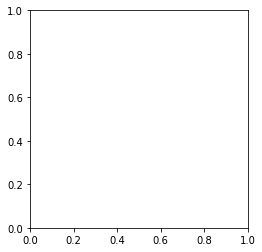

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 0
print("ans:", class_names[train_labels[idx]])
plt.imshow(train_images[idx], cmap="gray")

In [72]:
# 將這些值縮放到0到1的範圍，然後再將其輸入神經網絡模型。
# 為此，將值除以255。以相同的方式預處理訓練集和測試集非常重要。
train_image = train_images / 255
test_image = test_images / 255


<function matplotlib.pyplot.show>

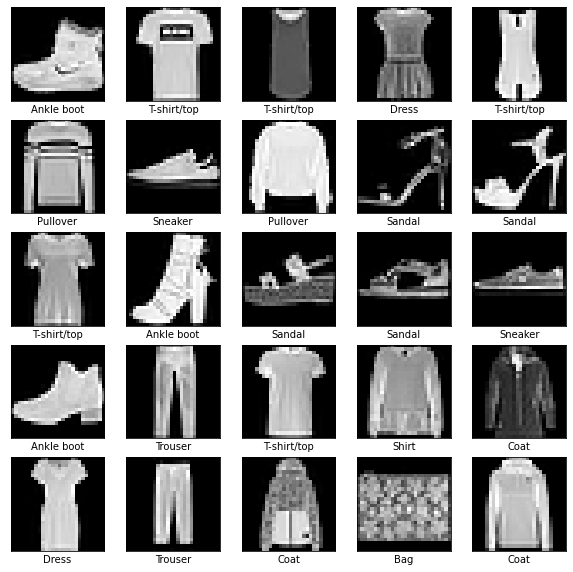

In [73]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap="gray")
  plt.xlabel(class_names[train_labels[i]])
plt.show


In [74]:
import pandas as pd
pd.DataFrame(train_images[i])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,90,156,177,182,196,176,117,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,2,0,0,239,253,239,214,226,214,231,245,248,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,36,241,203,219,192,190,193,207,200,232,135,0,0,2,0,0,0,0,0,0
3,0,0,0,0,1,0,0,33,167,227,229,234,228,234,244,215,211,214,208,120,0,0,2,0,0,0,0,0
4,0,0,0,0,0,0,157,227,207,207,229,229,232,207,241,227,235,224,203,221,176,0,0,2,0,0,0,0
5,0,0,0,0,0,65,218,189,192,187,196,189,188,202,181,195,222,219,190,180,217,125,0,0,0,0,0,0
6,0,0,0,0,0,158,213,196,196,191,188,186,179,192,177,192,126,155,193,189,200,166,0,0,0,0,0,0
7,0,0,0,0,0,163,217,211,176,188,188,186,183,196,180,191,165,170,216,204,200,195,0,0,0,0,0,0
8,0,0,0,0,0,183,215,234,185,182,186,183,184,198,181,185,195,188,203,245,207,209,37,0,0,0,0,0
9,0,0,0,0,0,196,215,240,209,188,183,186,186,190,186,188,188,183,212,253,205,217,64,0,0,0,0,0


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [76]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [77]:
train_image = train_images.reshape(-1, 784) / 255
test_image = test_images.reshape(-1, 784) / 255

In [78]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
save_callback = ModelCheckpoint("mnist.h5", save_best_only=True)
stop_callback = EarlyStopping(patience=5, restore_best_weights=True)
# batch_size: 看幾筆再做一次梯度(平均)下降[20-200]
# validation_split: 切出一部分資料來驗證模型好壞
# epoch: 整份資料要看幾輪
# verbose: 2 不要進度條
model.fit(train_image, 
     train_labels,
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=[stop_callback, save_callback])

Epoch 1/50
270/270 - 1s - loss: 0.6086 - accuracy: 0.7920 - val_loss: 0.4565 - val_accuracy: 0.8352
Epoch 2/50
270/270 - 1s - loss: 0.4254 - accuracy: 0.8507 - val_loss: 0.4023 - val_accuracy: 0.8562
Epoch 3/50
270/270 - 1s - loss: 0.3815 - accuracy: 0.8659 - val_loss: 0.3784 - val_accuracy: 0.8622
Epoch 4/50
270/270 - 1s - loss: 0.3552 - accuracy: 0.8749 - val_loss: 0.3696 - val_accuracy: 0.8695
Epoch 5/50
270/270 - 1s - loss: 0.3393 - accuracy: 0.8796 - val_loss: 0.3441 - val_accuracy: 0.8752
Epoch 6/50
270/270 - 1s - loss: 0.3200 - accuracy: 0.8861 - val_loss: 0.3439 - val_accuracy: 0.8748
Epoch 7/50
270/270 - 1s - loss: 0.3045 - accuracy: 0.8913 - val_loss: 0.3337 - val_accuracy: 0.8798
Epoch 8/50
270/270 - 1s - loss: 0.2969 - accuracy: 0.8931 - val_loss: 0.3371 - val_accuracy: 0.8800
Epoch 9/50
270/270 - 1s - loss: 0.2847 - accuracy: 0.8977 - val_loss: 0.3373 - val_accuracy: 0.8782
Epoch 10/50
270/270 - 1s - loss: 0.2784 - accuracy: 0.8991 - val_loss: 0.3200 - val_accuracy: 0.8815

In [79]:
model.evaluate(test_images_norm, test_labels)


313/313 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8854


[0.33066225051879883, 0.8853999972343445]

In [80]:
# sklearn: predict(預測類別) predict_proba(預測機率)
# tensorflow: predict_classes(預測類別) predict(預測機率)
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, ..., 8, 1, 5])

In [83]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(test_labels, pre),
       index=["{}(真實)".format(i) for i in class_names],
       columns=["{}(預測)".format(i) for i in class_names])

,T-shirt/top(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle boot(預測)
T-shirt/top(真實),813,2,23,31,3,3,118,0,7,0
Trouser(真實),1,977,1,16,3,0,1,0,1,0
Pullover(真實),11,0,836,16,83,0,53,0,1,0
Dress(真實),19,12,10,910,23,0,21,0,4,1
Coat(真實),0,1,106,42,798,0,52,0,1,0
Sandal(真實),0,0,0,1,0,971,0,15,1,12
Shirt(真實),99,0,105,40,60,0,685,0,11,0
Sneaker(真實),0,0,0,0,0,26,0,934,1,39
Bag(真實),5,0,6,6,3,4,5,3,968,0
Ankle boot(真實),0,0,0,0,0,7,1,30,0,962


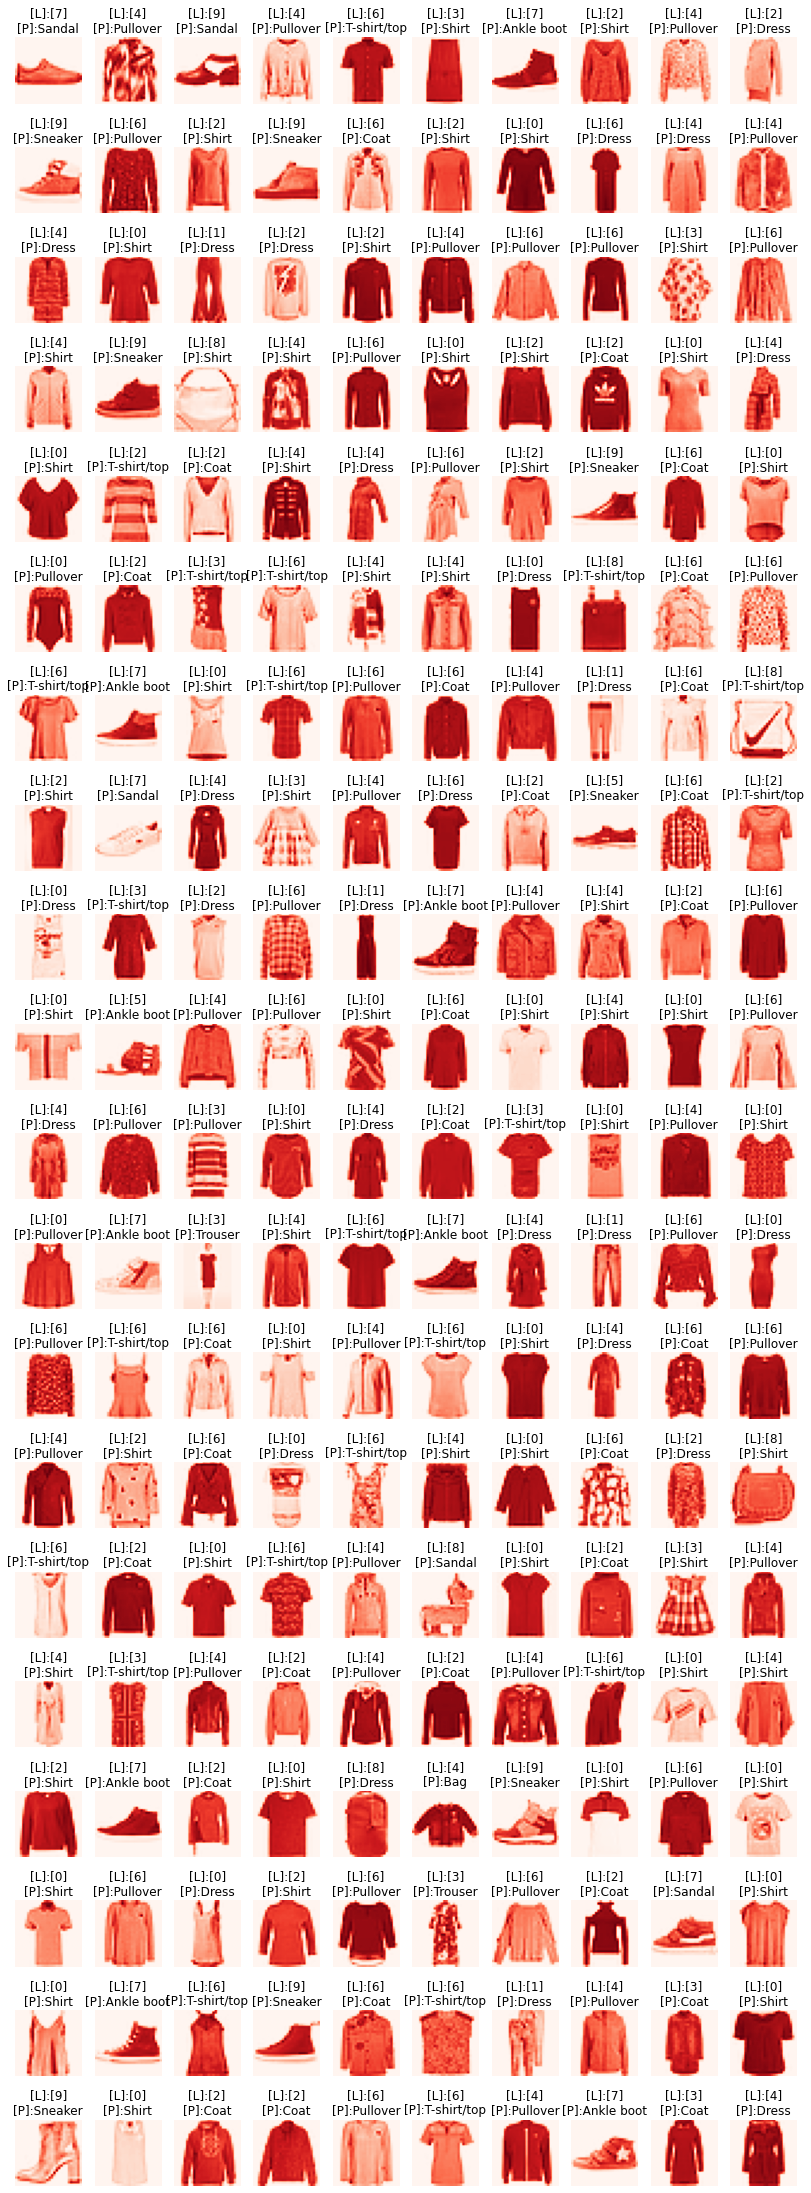

In [87]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 42))
idx = np.nonzero(pre != test_labels)[0][:200]
width = 10
height = len(idx) // width + 1
for i, d  in enumerate(idx):
    img, label, p = test_images[d], [test_labels[d]], class_names[pre[d]]
    t = "[L]:{}\n[P]:{}".format(label, p)
    plt.subplot(height, width, i+1)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="Reds")

檔名:test.png
T-shirt/top 的機率: 0.39
Trouser 的機率: 0.05
Pullover 的機率: 0.22
Dress 的機率: 0.03
Coat 的機率: 0.01
Sandal 的機率: 0.17
Shirt 的機率: 0.05
Sneaker 的機率: 0.0
Bag 的機率: 0.07
Ankle boot 的機率: 0.0


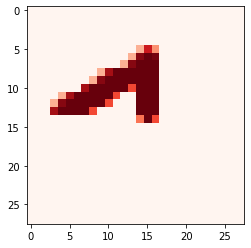

In [89]:
from tensorflow.keras.preprocessing.image import load_img
fn = input("檔名:")
img = load_img(fn, target_size=(28, 28)).convert("L")
img_np = np.array(img).reshape(1, 784) / 255
pre = model.predict(img_np)[0]
for i in range(10):
    print(class_names[i], "的機率:", round(pre[i], 2))
plt.imshow(np.array(img), cmap="Reds")